# Сборный проект

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. 
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


* Откроем файл с данными и изучим общую информацию
* Подготовим данные
* Заменим названия столбцов (приведем к нижнему регистру).
* Преобразуем данные в нужные типы.
* Обработаем пропуски при необходимости.
* Посчитаем суммарные продажи во всех регионах.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
try: 
    data = pd.read_csv('games.csv')
except: 
    data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#data = data.rename(columns = {'Name':'name', 'Platform':'platform', 'Year_of_Release' : 'year_of_release'\
#                             ,'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales'\
#                             :'jp_sales','Other_sales': 'other_sales', 'Critic_Score': 'critic_score'\
#                             , 'User_Score': 'user_score', 'Rating':'rating'})

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Все выглядит достаточно правдоподобно. Заметно, что много пропусков.
Не видим данные по оценке пользователей, надо менять тип данных. Но сначала их изучить.


In [8]:
data['user_score'].unique()
data[data.user_score == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Здесь я столкнулась со значением tbd в столбце оценка игрока, как я поняла это обозначает, что оценка неопределена. Решила оставить как -1, чтобы не смешивать с нулевым рейтингом

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data[data.user_score == 'tbd']
data['user_score'] = data['user_score'].fillna(-1).astype('float')


In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data['rating'] = data['rating'].str.lower()

In [12]:
data[data.rating.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


Очень много пропущенных значений в столбце рейтинг. Оставляю. Боюсь, если заполню медианой, адекватная картина "съедет"

In [13]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [15]:
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


<div class="alert alert-">
    Удаляем две игры без названия 

In [16]:
data = data.dropna(subset =['name'])
data.reset_index(drop=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [17]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [18]:
#data['name'] = data['name'].str.lower()

In [19]:
data.duplicated().sum() # явных дубликатов необнаружено

0

In [20]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [21]:
data['platform'] = data['platform'].str.lower()

In [22]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [23]:
data[data.year_of_release.isna()].head(10)
len(data[data.year_of_release.isna()])

269

In [24]:
#for elem in data['name'].unique():
#    data.loc[(data['year_of_release'].isna()) & (data['name'] == elem)\
#             , 'year_of_release']\
 #   = data.loc[(data['name'] == elem),'year_of_release'].median()

In [25]:
data[data.year_of_release.isna()] \
= data.dropna(subset = ['year_of_release']).reset_index(drop=True)

In [26]:
data.year_of_release.isna().sum()


3

In [27]:
data['genre'] = data['genre'].str.lower()

In [28]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [29]:
data[data['na_sales'] == 0].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,psp,2010.0,role-playing,0.0,0.00,4.87,0.00,NaN,-1.0,NaN
340,Friend Collection,ds,2009.0,misc,0.0,0.00,3.67,0.00,NaN,-1.0,NaN
385,Monster Hunter 4,3ds,2013.0,role-playing,0.0,0.00,3.44,0.00,NaN,-1.0,NaN
403,English Training: Have Fun Improving Your Skills!,ds,2006.0,misc,0.0,0.99,2.32,0.02,NaN,-1.0,NaN
428,Dragon Quest VI: Maboroshi no Daichi,snes,1995.0,role-playing,0.0,0.00,3.19,0.00,NaN,-1.0,NaN
530,Dragon Quest V: Tenkuu no Hanayome,snes,1992.0,role-playing,0.0,0.00,2.78,0.01,NaN,-1.0,NaN
563,Yokai Watch 2 Shinuchi,3ds,2014.0,role-playing,0.0,0.00,2.68,0.00,NaN,-1.0,NaN
574,Super Mario Bros.: The Lost Levels,nes,1986.0,platform,0.0,0.00,2.65,0.00,NaN,-1.0,NaN
632,Final Fantasy V,snes,1992.0,role-playing,0.0,0.00,2.43,0.02,NaN,-1.0,NaN
674,Dragon Warrior Monsters,gb,1998.0,role-playing,0.0,0.00,2.34,0.01,NaN,-1.0,NaN


Можно заметить, что нулевые продажи в Северной Америке и почти все нулевые продажи в Европе, сопровождаются продажами в Японии.
Соответственно, возможно это игры которые были выпущены для Японии и продавались в основном внутри страны.

In [30]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


Оставляю пропущенные значения по той же причине. Слишком много пропущенных значений. Результат исследований сильно исказится, на мой взгляд

In [31]:
data.isna().sum()

name                  3
platform              3
year_of_release       3
genre                 3
na_sales              3
eu_sales              3
jp_sales              3
other_sales           3
critic_score       8611
user_score            3
rating             6793
dtype: int64

In [34]:
data['sum_of_sales'] = data['na_sales'] + data['eu_sales']\
+ data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN,40.24
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN,31.38
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN,30.26
6,New Super Mario Bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,Wii Play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,New Super Mario Bros. Wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,Duck Hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN,28.31


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Мы молодцы, не забыли создать колонку с общими продажами. 👍 <br> А можно использовать вот такой код:</font><br>
` = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)`

In [35]:
len(data)/16715 # проверяем потерю в таблице. все в пределах допустимого

0.9998803469937182

* Переходим к исследованию

In [36]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16710 non-null  object 
 1   platform         16710 non-null  object 
 2   year_of_release  16710 non-null  float64
 3   genre            16710 non-null  object 
 4   na_sales         16710 non-null  float64
 5   eu_sales         16710 non-null  float64
 6   jp_sales         16710 non-null  float64
 7   other_sales      16710 non-null  float64
 8   critic_score     8102 non-null   float64
 9   user_score       16710 non-null  float64
 10  rating           9920 non-null   object 
 11  sum_of_sales     16710 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name  : кол-во 0 0 , пр

In [37]:
data['rating'] = data['rating'].fillna('no_rating')

In [38]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,-1.0,no_rating,40.24
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,no_rating,31.38


# Исследовательский анализ данных

* Посмотрим, сколько игр выпускалось в разные годы. 
* Посмотрим, как менялись продажи по платформам. 
* Выберем актуальный период для исследования. 
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
* Посмотрим на общее распределение игр по жанрам. 

In [39]:
data.groupby('year_of_release')['name']. count()

year_of_release
1980.0       9
1981.0      47
1982.0      37
1983.0      17
1984.0      14
1985.0      15
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     226
1996.0     266
1997.0     293
1998.0     381
1999.0     343
2000.0     354
2001.0     484
2002.0     840
2003.0     786
2004.0     775
2005.0     951
2006.0    1022
2007.0    1221
2008.0    1446
2009.0    1455
2010.0    1287
2011.0    1152
2012.0     660
2013.0     554
2014.0     592
2015.0     619
2016.0     514
Name: name, dtype: int64

In [40]:
# Комментарий ревьюера 2
data.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

In [41]:
data = data.query('year_of_release != [2001.5, 2002.5, 2005.5, 2013.5]')
data.reset_index(drop=True)# reset по всей таблице? Эта ошибка?


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Super Mario Bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,-1.0,no_rating,40.24
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,-1.0,no_rating,0.01
16709,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,-1.0,no_rating,0.01
16710,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,-1.0,no_rating,0.01
16711,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,-1.0,no_rating,0.01


Сталкиваемся с ошибочными строками 2013.5, 2005.5.. удаляем их 

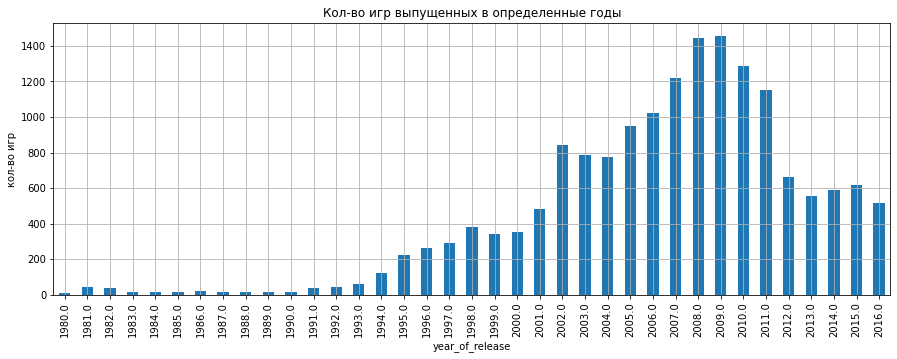

In [42]:
data[data['year_of_release']].groupby('year_of_release')['name']. count()\
.plot(kind = 'bar', grid = True, figsize = (15,5))
plt.ylabel('кол-во игр')
plt.title('Кол-во игр выпущенных в определенные годы');

Здесь мы смотрим какие года являлись самыми плодотворными на выпуск игр. Видим, что в 2006-2011г.г на рынок вышло очень много нового.

По графику мы можем сделать вывод, что значимый рост в кол-ве выпускаемых игр в год начинается с 1995года от 200 игр. А, в 2002 году существенный скачок до 800. Самые высокие показатели у 2008, 2009. В эти годы выпускается наибольшее кол-во игр. С 2011 наблюдается серьезный спад.

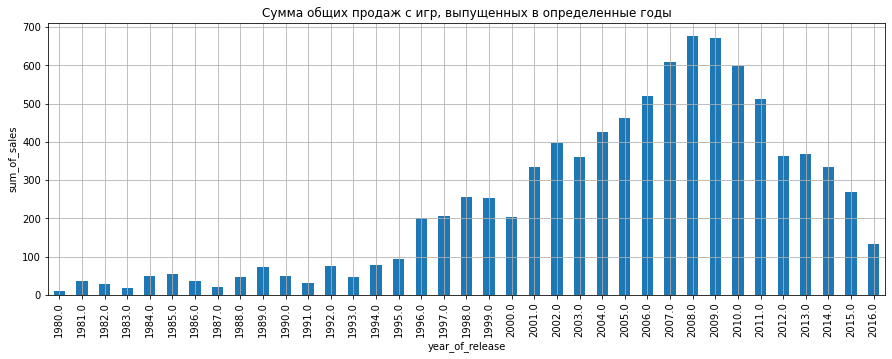

In [43]:
data[data['year_of_release'] != 2999].groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid = True, figsize = (15,5))
plt.ylabel('sum_of_sales')
plt.title('Cумма общих продаж с игр, выпущенных в определенные годы');

Мы видим как существенно растет доход с продаж игр с 1996года до 2008-2009 года. Затем начинается спад. Возможно это говорит о перенасыщении рынка. Ведь по предыдущиму графику мы видим, что наибольшее кол-во игр было выпущено в этих же годах.

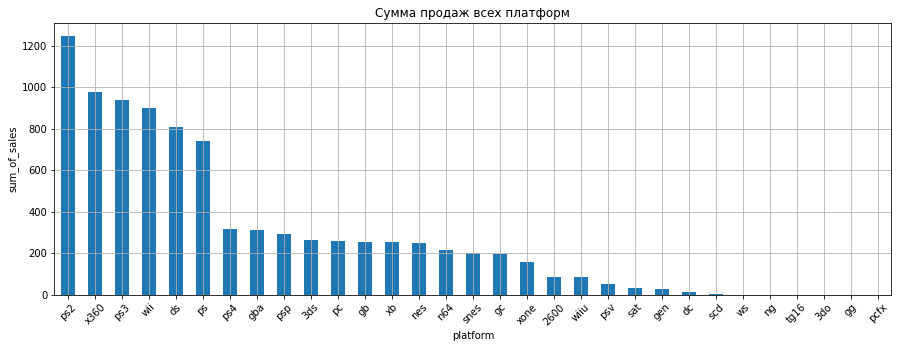

In [44]:
data.groupby('platform')['sum_of_sales'].sum().sort_values(ascending = False)\
.plot(kind = 'bar', figsize = (15,5),grid = True)
plt.ylabel('sum_of_sales')
plt.xticks(rotation=45)
plt.title('Сумма продаж всех платформ');

 Наиболее интересны 6 платформ с наиболее высокими суммами продаж, изучим их подробнее

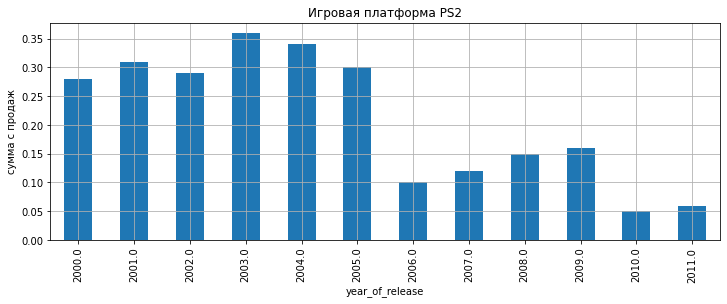

In [45]:
data_ps2 = data[data.platform == 'ps2']
data_ps2.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')
plt.title ('Игровая платформа PS2');

Мы наблюдаем на графике, что платформа ps2 с самыми высокими суммарными продажами, была на пике около 11 лет. Появилась в 2000 году и последнии продажи  осуществила в 2011. Самые высокие продажи наблюдаются в 2001-2005 гг.

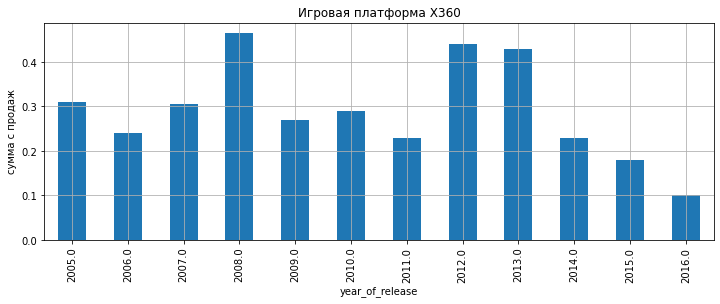

In [46]:
data_x360 = data[data.platform == 'x360']
data_x360.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')                                                              
plt.title ('Игровая платформа X360');
                                                               

 Платформа X360 имела высокий доход в 2005-2016гг. Наблюдается некоторый спад в доходе с 2014 года.

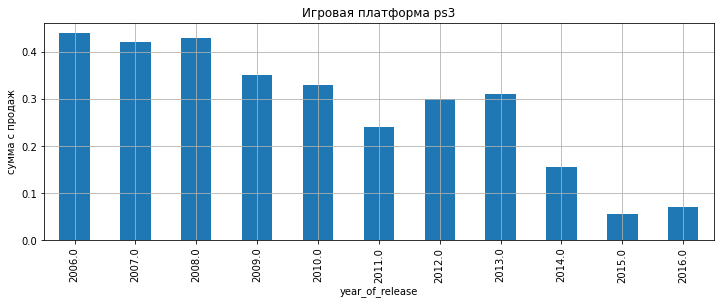

In [47]:
data_ps3 = data[data.platform == 'ps3']
data_ps3.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')                                                               
plt.title ('Игровая платформа ps3');

Платформа PS3 начала получать доход с 2005г. С 2014 наблюдается спад.

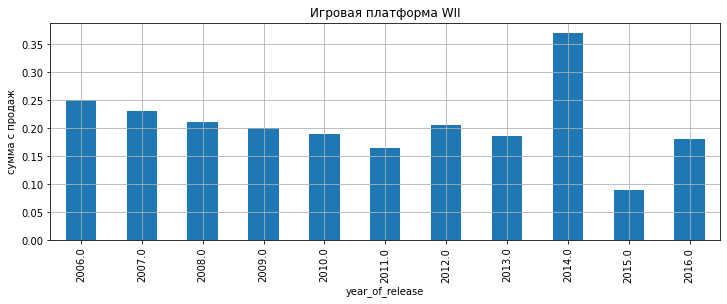

In [48]:
data_wii = data[data.platform == 'wii']
data_wii.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')                                                               
plt.title ('Игровая платформа WII');

Платформа Wii продает игры с 2006г. Мы можем сделать вывод, что пик по доходу был в 2014 году.

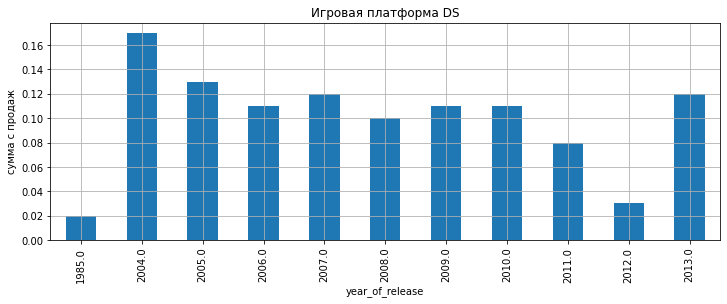

In [49]:
data_ds = data[data.platform == 'ds']
data_ds.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')                                                               
plt.title ('Игровая платформа DS');

У платформы DS основная масса продаж игр в 2004-2013гг. Основные высокие продажи наблюдаются в 2004 и 2013г. 

In [50]:
data_ds[data_ds.year_of_release == 1985]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
15704,Strongest Tokyo University Shogi DS,ds,1985.0,action,0.0,0.0,0.02,0.0,NaN,-1.0,no_rating,0.02
15957,Strongest Tokyo University Shogi DS,ds,1985.0,action,0.0,0.0,0.02,0.0,NaN,-1.0,no_rating,0.02


In [51]:
data = data[data.year_of_release != 1985] # удаляем выброс
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
2,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
3,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,no_rating,31.38
4,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,no_rating,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...
16693,Samurai Warriors: Sanada Maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,-1.0,no_rating,0.01
16694,LMA Manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,-1.0,no_rating,0.01
16695,Haitaka no Psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,-1.0,no_rating,0.01
16696,Spirits & Spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,-1.0,no_rating,0.01


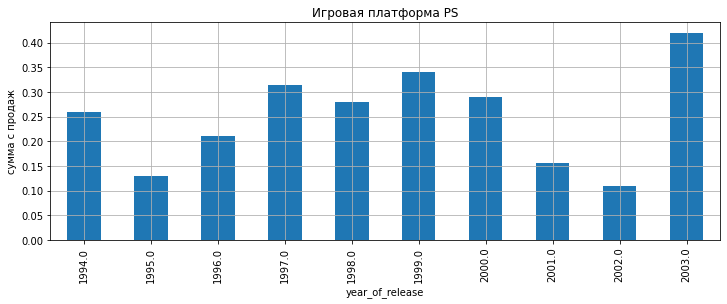

In [52]:
data_ps = data[data.platform == 'ps']
data_ps.groupby('year_of_release')['sum_of_sales'].median()\
.plot(kind = 'bar', figsize = (12,4), grid = True)
plt.ylabel('сумма c продаж')                                                               
plt.title ('Игровая платформа PS');

У платформы PS основная масса продаж игр в 1994-2003гг. Пик в 2003г.

#### * По проведенным исследованиям можно сделать вывод, что активность по доходам на определенной платформе определена интервалом примерно в 10 лет.  Соответственно для того, чтобы делать какие-то предположения на 2017 г. мы должны исследовать данные за этот период. Некоторые платформы перестают существовать на пике своих продаж. Возможно платформы обновляются через 10 лет  и запускаются снова с дополнениями

Хорошо ))), просто некоторым людям тяжело отказываться от отжившей информации. Все кажется важным. Вообще по графикам мне просится как-будто бы с 2014 года рассматривать. Но я не могу ...оставляю 2013 )))

In [53]:
df = data.query('year_of_release >=2013').reset_index(drop = True)
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_of_sales
count,2279.000000,2279.000000,2279.00000,2279.000000,2279.000000,1010.000000,2279.000000,2279.000000
mean,2014.479596,0.194054,0.17473,0.063418,0.053124,72.062376,3.042431,0.485327
std,1.089660,0.542923,0.50943,0.234930,0.164176,12.782664,3.967712,1.227831
min,2013.000000,0.000000,0.00000,0.000000,0.000000,13.000000,-1.000000,0.010000
25%,2014.000000,0.000000,0.00000,0.000000,0.000000,66.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.03000,0.010000,0.010000,74.000000,3.400000,0.110000
75%,2015.000000,0.150000,0.13000,0.050000,0.040000,81.000000,7.100000,0.400000
max,2016.000000,9.660000,9.09000,4.350000,3.960000,97.000000,9.300000,21.050000


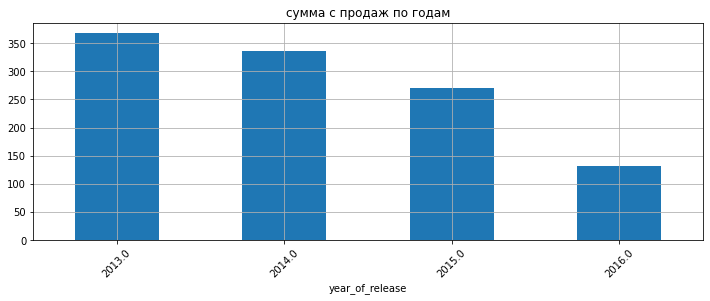

In [54]:
df[df['year_of_release']!= 2999].groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (12,4))
plt.title('суммa c продаж по годам')
plt.xticks(rotation=45)
plt.show();    

Общая тенденция падение общей суммы с продаж с 2013 года. Допускаю, что данные по 2016 году неполные, по  ним сложно делать выводы

In [55]:
df['year_of_release'].astype('int')

0       2013
1       2013
2       2015
3       2013
4       2014
        ... 
2274    2016
2275    2014
2276    2016
2277    2016
2278    2016
Name: year_of_release, Length: 2279, dtype: int64

In [56]:
df['platform'].unique()

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

* Игровые платформы существующие в 2013 году

In [57]:
df.loc[df['year_of_release'] == 2016]['platform'].unique()


array(['ps4', '3ds', 'xone', 'wiiu', 'ps3', 'pc', 'x360', 'psv', 'wii'],
      dtype=object)

* Игровые платформы оставшиеся к 2016 году. Их и исследуем.

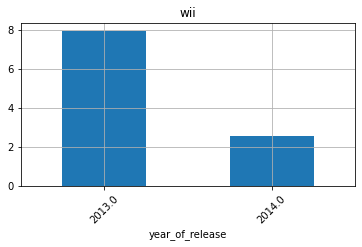

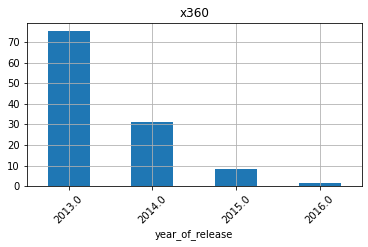

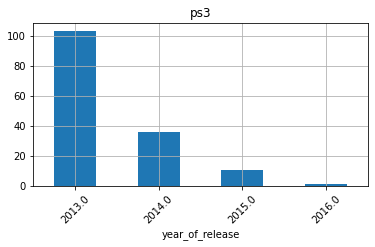

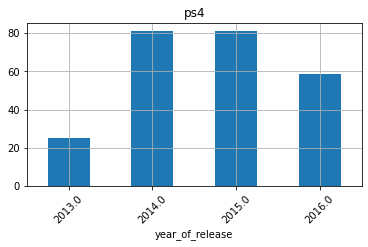

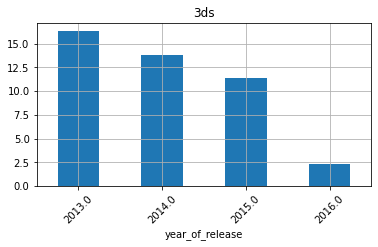

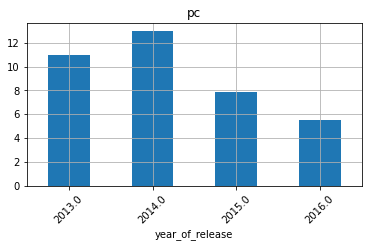

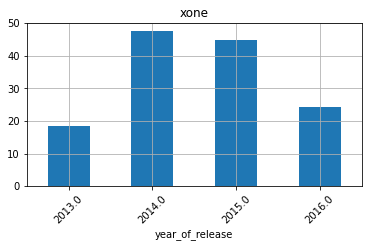

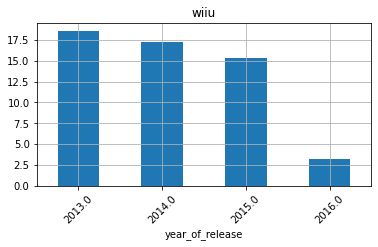

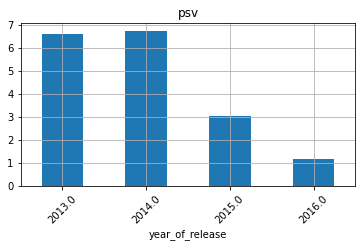

In [58]:
df_wii = df[(df.platform == 'wii') & (df.user_score != -1)]
df_wii.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('wii')
plt.xticks(rotation=45)
plt.show();


df_x360 = df[(df.platform == 'x360') & (df.user_score != -1)]
df_x360.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('x360')
plt.xticks(rotation=45)
plt.show();

df_ps3 = df[(df.platform == 'ps3')  & (df.user_score != -1)]
df_ps3.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('ps3')
plt.xticks(rotation=45)
plt.show();

df_ps4 = df[(df.platform == 'ps4')  & (df.user_score != -1)]
df_ps4.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('ps4')
plt.xticks(rotation=45)
plt.show();


df_3ds = df[(df.platform == '3ds')  & (df.user_score != -1)]
df_3ds.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('3ds')
plt.xticks(rotation=45)
plt.show();

df_pc = df[(df.platform == 'pc')  & (df.user_score != -1)]
df_pc.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('pc')
plt.xticks(rotation=45)
plt.show();

df_xone = df[(df.platform == 'xone')  & (df.user_score != -1)]
df_xone.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('xone')
plt.xticks(rotation=45)
plt.show();

df_wiiu = df[(df.platform == 'wiiu')  & (df.user_score != -1)]
df_wiiu.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('wiiu')
plt.xticks(rotation=45)
plt.show();


df_psv = df[(df.platform == 'psv')  & (df.user_score != -1)]
df_psv.groupby('year_of_release')['sum_of_sales'].sum()\
.plot(kind = 'bar', grid=True, figsize = (6,3))
plt.title ('psv')
plt.xticks(rotation=45)
plt.show();


* Рабочими вариантами остаются:  ps4, 3ds, pc, xone, wiiu, psv

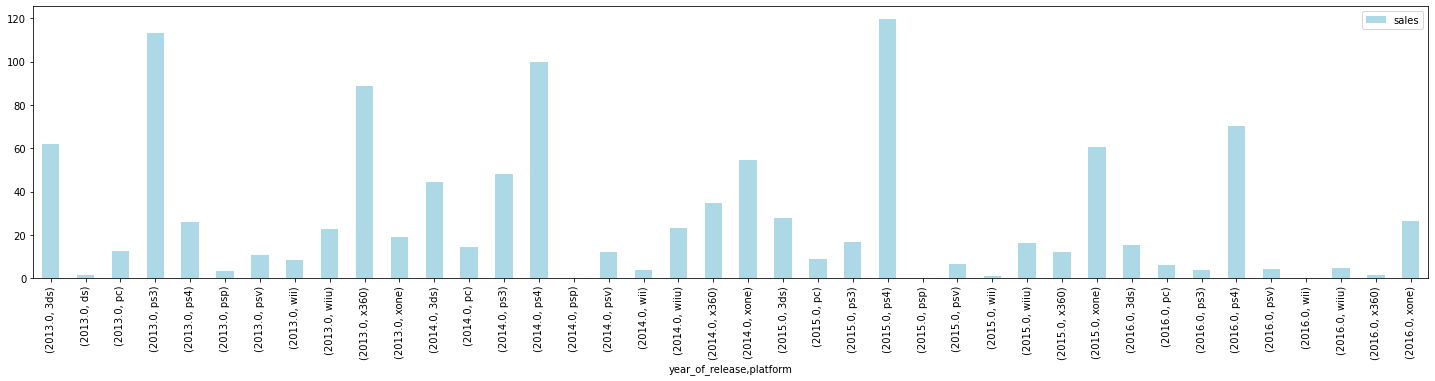

In [59]:
df.groupby(['year_of_release', 'platform'])\
.agg(sales = ('sum_of_sales', 'sum'))\
.plot(kind = 'bar', figsize = (25, 5),color='lightblue');
#plt.xticks(rotation=45);

(0.0, 5.0)

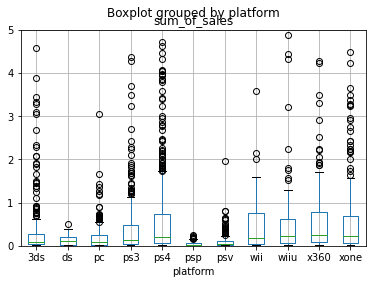

In [60]:
df.boxplot('sum_of_sales', 'platform')
plt.ylim(0,5)

(0.0, 1.5)

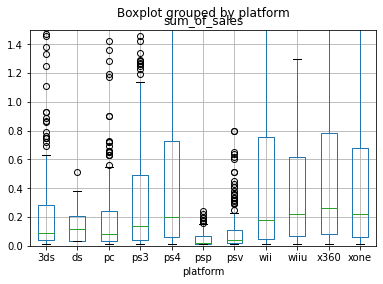

In [61]:
df.boxplot('sum_of_sales', 'platform')
plt.ylim(0,1.5)

Еще раз убеждаемся, что основными доходными платформами являются: xone, ps4, x360, wii, wiiu, 3ds

#### Исследуем на базе платформы PS4  влияние на продажи, отзывов пользователей и критиков.

In [62]:
df_ps4['user_score'].unique()


array([8.3, 4.3, 5.7, 5. , 6.5, 6.1, 7.9, 8.1, 3.4, 8.4, 6.3, 7.7, 9.2,
       4.9, 7.6, 6.7, 3.7, 7. , 6.9, 8.2, 6.8, 5.9, 7.8, 8.6, 7.3, 7.4,
       6.2, 6. , 7.1, 5.1, 6.6, 5.4, 4.5, 8.8, 8.5, 5.2, 7.2, 7.5, 5.5,
       3.6, 5.6, 8. , 8.7, 5.8, 3.8, 4.7, 3.3, 2.7, 2. , 1.5, 4.1, 6.4,
       2.9, 1.9, 3. , 3.5, 2.3])

In [63]:

df_ps4.groupby('year_of_release')['user_score'].median()

year_of_release
2013.0    6.20
2014.0    6.95
2015.0    7.10
2016.0    7.30
Name: user_score, dtype: float64

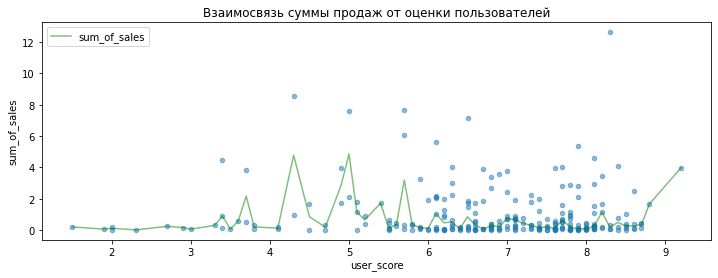

'коэффициент корреляции:'

-0.03380016634442011

In [64]:
ax = df_ps4.plot(x = 'user_score', y = 'sum_of_sales', kind = 'scatter'\
                 , alpha = 0.5, figsize = (12,4))
df_ps4.pivot_table(index = 'user_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)
plt.title('Взаимосвязь суммы продаж от оценки пользователей')
plt.show()
display('коэффициент корреляции:', df_ps4['user_score']\
        .corr(df_ps4['sum_of_sales']))

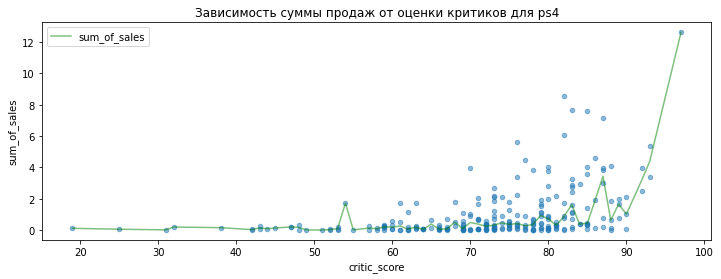

'коэффициент корреляции:'

0.40589946324845355

In [65]:
ax = df_ps4.plot(x = 'critic_score', y = 'sum_of_sales', kind = 'scatter'\
                 , alpha = 0.5, figsize = (12,4))
df_ps4.pivot_table(index = 'critic_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)
plt.title('Зависимость суммы продаж от оценки критиков для ps4')
plt.show()
display('коэффициент корреляции:', df_ps4['critic_score']\
        .corr(df_ps4['sum_of_sales']))

Мы можем сделать вывод, что зависимость суммы продаж от оценки игроков незначительная и при этом отрицательная. А, вот зависимость от оценки критиков достаточно заметна и положительна для данной платформы.

#### Продажи игр на разных платформах

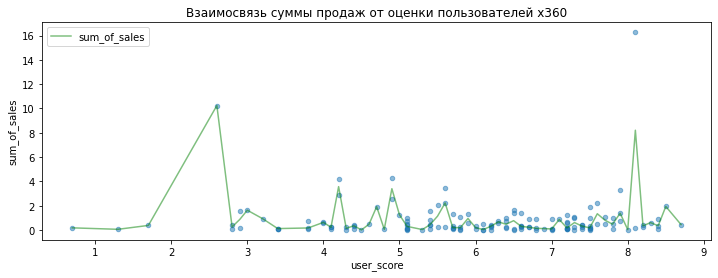

'коэффициент корреляции:'

-0.007396432368018448

'Топ 15, продаваемых игр :'

,name,sum_of_sales,genre
1,Grand Theft Auto V,16.27,action
6,Call of Duty: Ghosts,10.24,shooter
38,Call of Duty: Advanced Warfare,4.28,shooter
41,FIFA 14,4.22,sports
58,Battlefield 4,3.49,shooter
64,Assassin's Creed IV: Black Flag,3.31,action
79,FIFA 15,2.92,sports
88,NBA 2K14,2.52,sports
104,Madden NFL 25,2.23,sports
105,LEGO Marvel Super Heroes,2.22,action


In [66]:
ax = df_x360.plot(x = 'user_score', y = 'sum_of_sales', kind = 'scatter'\
                  , alpha = 0.5, figsize = (12,4))
df_x360.pivot_table(index = 'user_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)

plt.title('Взаимосвязь суммы продаж от оценки пользователей x360')
plt.show()
display('коэффициент корреляции:', df_x360['user_score']\
        .corr(df_x360['sum_of_sales']))
display('Топ 15, продаваемых игр :')
df_x360[['name', 'sum_of_sales', 'genre']].head(15)

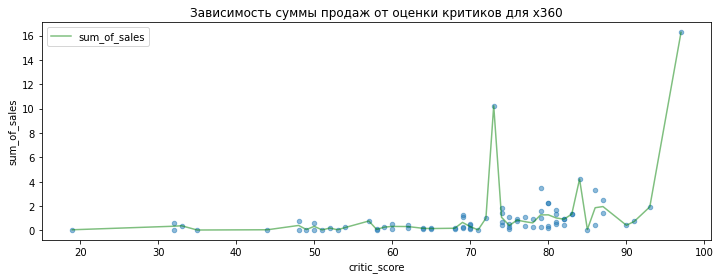

'коэффициент корреляции:'

0.3503445460228664

In [67]:
ax = df_x360.plot(x = 'critic_score', y = 'sum_of_sales', kind = 'scatter'\
                 , alpha = 0.5, figsize = (12,4))
df_x360.pivot_table(index = 'critic_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)
plt.title('Зависимость суммы продаж от оценки критиков для x360')
plt.show()
display('коэффициент корреляции:', df_x360['critic_score']\
        .corr(df_x360['sum_of_sales']))

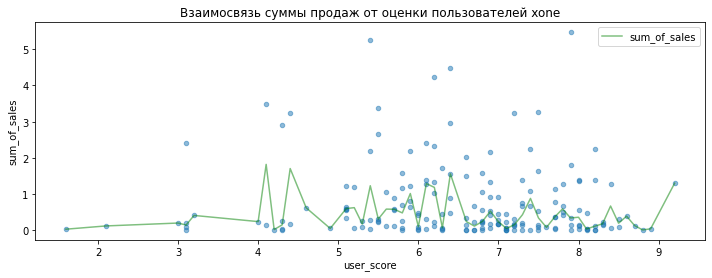

'коэффициент корреляции:'

-0.06953551457156777

'Предпочитаемый жанр:'

action          60
sports          35
shooter         31
racing          16
misc            12
role-playing     9
adventure        8
platform         5
fighting         5
strategy         2
simulation       1
Name: genre, dtype: int64

'Топ 15, продаваемых игр :'

,name,sum_of_sales,genre
22,Grand Theft Auto V,5.47,action
24,Call of Duty: Advanced Warfare,5.26,shooter
32,Halo 5: Guardians,4.49,shooter
40,Fallout 4,4.22,role-playing
56,Assassin's Creed: Unity,3.50,action
62,Destiny,3.37,shooter
66,Gears of War: Ultimate Edition,3.28,shooter
67,FIFA 16,3.25,sports
70,Halo: The Master Chief Collection,3.23,shooter
77,Titanfall,2.95,shooter


In [68]:
ax = df_xone.plot(x = 'user_score', y = 'sum_of_sales', kind = 'scatter'\
                  , alpha = 0.5, figsize = (12,4))
df_xone.pivot_table(index = 'user_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)

plt.title('Взаимосвязь суммы продаж от оценки пользователей xone')
plt.show()
display('коэффициент корреляции:', df_xone['user_score']\
        .corr(df_xone['sum_of_sales']))
display('Предпочитаемый жанр:', df_xone['genre'].value_counts())
display('Топ 15, продаваемых игр :')
df_xone[['name', 'sum_of_sales', 'genre']].head(15)

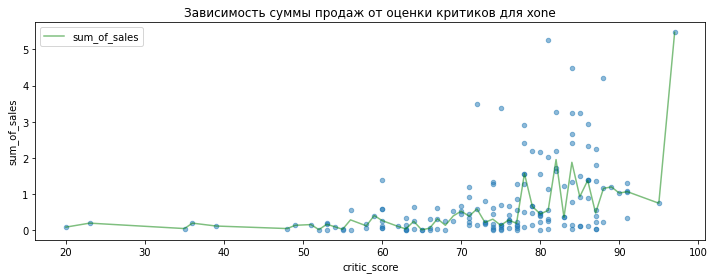

'коэффициент корреляции:'

0.40746385744229674

In [69]:
ax = df_xone.plot(x = 'critic_score', y = 'sum_of_sales', kind = 'scatter'\
                 , alpha = 0.5, figsize = (12,4))
df_xone.pivot_table(index = 'critic_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)
plt.title('Зависимость суммы продаж от оценки критиков для xone')
plt.show()
display('коэффициент корреляции:', df_xone['critic_score']\
        .corr(df_xone['sum_of_sales']))

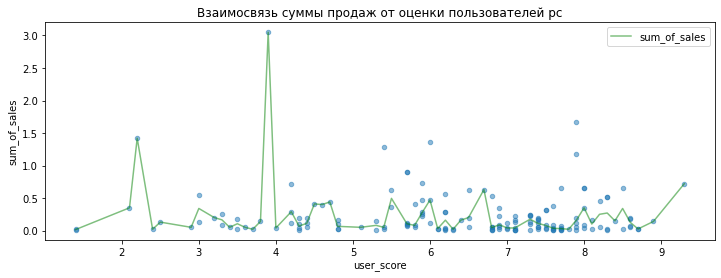

'коэффициент корреляции:'

-0.08253105686192254

'Топ 15, продаваемых игр :'

,name,sum_of_sales,genre
74,The Sims 4,3.05,simulation
158,StarCraft II: Heart of the Swarm,1.67,strategy
185,SimCity (2013),1.42,simulation
197,Battlefield 4,1.36,shooter
209,Fallout 4,1.28,role-playing
231,Grand Theft Auto V,1.17,action
288,The Elder Scrolls Online,0.90,role-playing
295,The Elder Scrolls Online,0.90,role-playing
350,Dragon Age: Inquisition,0.73,role-playing
354,Total War: Rome II,0.72,strategy


In [70]:
ax = df_pc.plot(x = 'user_score', y = 'sum_of_sales', kind = 'scatter'\
                  , alpha = 0.5, figsize = (12,4))
df_pc.pivot_table(index = 'user_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)

plt.title('Взаимосвязь суммы продаж от оценки пользователей pc')
plt.show()
display('коэффициент корреляции:', df_pc['user_score'].corr(df_pc['sum_of_sales']))
display('Топ 15, продаваемых игр :')
df_pc[['name', 'sum_of_sales', 'genre']].head(15)

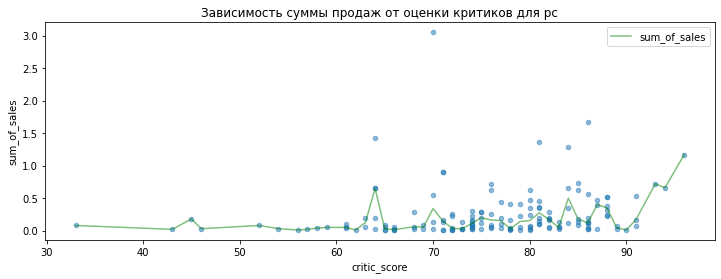

'коэффициент корреляции:'

0.18190082874194088

In [71]:
ax = df_pc.plot(x = 'critic_score', y = 'sum_of_sales', kind = 'scatter'\
                 , alpha = 0.5, figsize = (12,4))
df_pc.pivot_table(index = 'critic_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)
plt.title('Зависимость суммы продаж от оценки критиков для pc')
plt.show()
display('коэффициент корреляции:', df_pc['critic_score']\
        .corr(df_pc['sum_of_sales']))

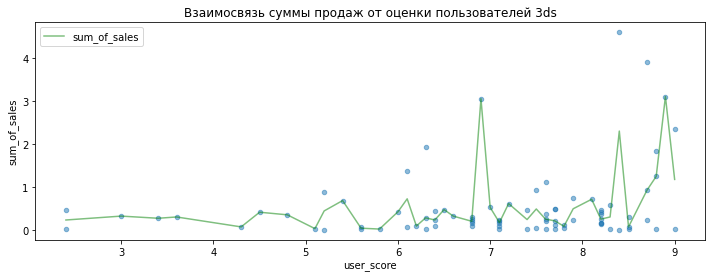

'коэффициент корреляции:'

0.23523841172481066

In [72]:
ax = df_3ds.plot(x = 'user_score', y = 'sum_of_sales', kind = 'scatter'\
                  , alpha = 0.5, figsize = (12,4))
df_3ds.pivot_table(index = 'user_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)

plt.title('Взаимосвязь суммы продаж от оценки пользователей 3ds')
plt.show()
display('коэффициент корреляции:', df_3ds['user_score']\
        .corr(df_3ds['sum_of_sales']))

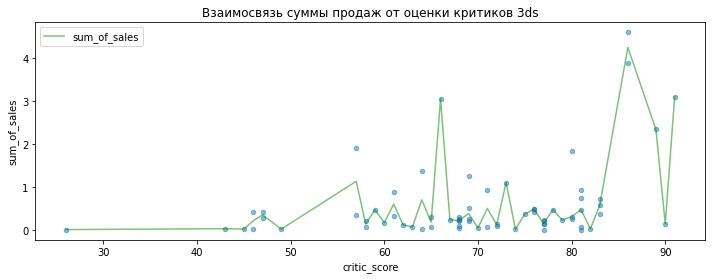

'коэффициент корреляции:'

0.33182952619613976

In [73]:
ax = df_3ds.plot(x = 'critic_score', y = 'sum_of_sales', kind = 'scatter'\
                  , alpha = 0.5, figsize = (12,4))
df_3ds.pivot_table(index = 'critic_score', values = 'sum_of_sales'\
                  , aggfunc = 'median').plot(ax = ax, color = 'green', alpha =0.5)

plt.title('Взаимосвязь суммы продаж от оценки критиков 3ds')
plt.show()
display('коэффициент корреляции:', df_3ds['critic_score']\
        .corr(df_3ds['sum_of_sales']))

In [74]:
df[df['name'] == 'Grand Theft Auto V']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Grand Theft Auto V,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
1,Grand Theft Auto V,x360,2013.0,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
4,Grand Theft Auto V,ps4,2014.0,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
22,Grand Theft Auto V,xone,2014.0,action,2.81,2.19,0.00,0.47,97.0,7.9,m,5.47
231,Grand Theft Auto V,pc,2015.0,action,0.39,0.69,0.00,0.09,96.0,7.9,m,1.17


In [75]:
df[df['name'] == 'Call of Duty: Advanced Warfare']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
11,Call of Duty: Advanced Warfare,ps4,2014.0,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
24,Call of Duty: Advanced Warfare,xone,2014.0,shooter,3.22,1.55,0.01,0.48,81.0,5.4,m,5.26
35,Call of Duty: Advanced Warfare,ps3,2014.0,shooter,1.56,1.93,0.19,0.68,NaN,4.8,m,4.36
38,Call of Duty: Advanced Warfare,x360,2014.0,shooter,2.77,1.11,0.00,0.40,NaN,4.9,m,4.28
561,Call of Duty: Advanced Warfare,pc,2014.0,shooter,0.15,0.23,0.00,0.03,78.0,4.5,m,0.41


In [76]:
df[df['name'] == 'Call of Duty: Ghosts']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
6,Call of Duty: Ghosts,x360,2013.0,shooter,6.73,2.56,0.04,0.91,73.0,2.6,m,10.24
7,Call of Duty: Ghosts,ps3,2013.0,shooter,4.10,3.63,0.38,1.25,71.0,2.6,m,9.36
50,Call of Duty: Ghosts,ps4,2013.0,shooter,1.78,1.43,0.05,0.57,78.0,3.7,m,3.83
78,Call of Duty: Ghosts,xone,2013.0,shooter,1.88,0.77,0.00,0.27,78.0,4.3,m,2.92
362,Call of Duty: Ghosts,pc,2013.0,shooter,0.23,0.41,0.00,0.05,NaN,-1.0,no_rating,0.69
637,Call of Duty: Ghosts,wiiu,2013.0,shooter,0.22,0.09,0.01,0.03,69.0,3.4,m,0.35


Мы видим, что платформы отличаются по представляемым играм. На некоторых  платформах безусловными лидерами являются : grand theft auto v, call of duty, fifa
На некоторых в которых в топ - 15 появляются ролевые и симуляторы, картинка по предпочтениям игр существенно меняется. Популярные игры среди ролевых: fallout, pokemon. Среди симуляций: animal crossing, sims. В рейсинге лидер: mario kart. На исследуемых нами платформах. Но, там где шутеры, экшн, спорт..те платформы приносят больший доход. Одна и та же игра может давать совершенно разный доход в зависимости от платформы. По диаграмме рассеяния мы видим, что некоторые платформы получают ровную сумму продаж примерно с рейтинг 5-8.5, на некоторых достаточно много аномальных игр.

Исследования по дополнительным платформам показало, что наши выводы верны. Зависимость суммы продаж от оценки пользователей незначительна.  Зависимость цены от оценки критиков положительна на всех исследованных платформах



Я окончательно запуталась в том, что я делаю. Если я снова  вас неверно поняла, напишите пожалуйста, пример конечного результата. Что мы должны получить...


In [77]:
df.pivot_table(index =['name', 'genre'], values ='sum_of_sales', aggfunc \
               = 'sum').sort_values(by = 'sum_of_sales', ascending = False).head(15)

,,sum_of_sales
name,genre,
Grand Theft Auto V,action,56.58
Call of Duty: Ghosts,shooter,27.39
Call of Duty: Black Ops 3,shooter,25.67
Minecraft,misc,24.16
Call of Duty: Advanced Warfare,shooter,21.97
FIFA 15,sports,17.37
FIFA 14,sports,16.46
FIFA 16,sports,16.30
Pokemon X/Pokemon Y,role-playing,14.60


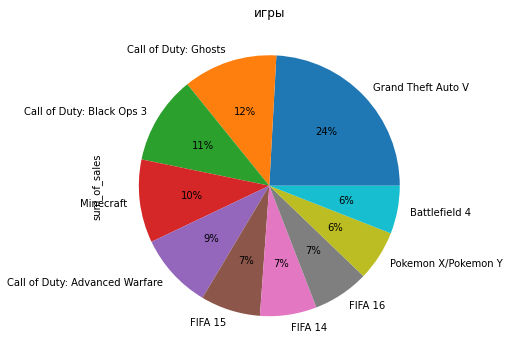

In [78]:
df.pivot_table(index='name', values = 'sum_of_sales', aggfunc = 'sum')\
.sort_values(by = 'sum_of_sales', ascending=False).head(10)\
.plot(kind='pie', autopct='%1.0f%%', y = 'sum_of_sales', figsize=(6, 6)\
      , legend=False, title = 'игры')
plt.show();

Общая картина топ 10, по всей таблице с 2013г. не противоречит нашим выводам в исследованиях по платформам.

3ds


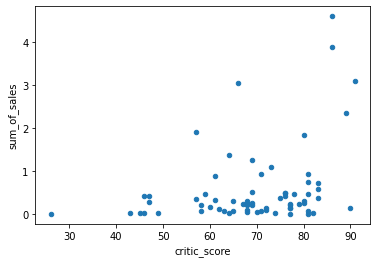

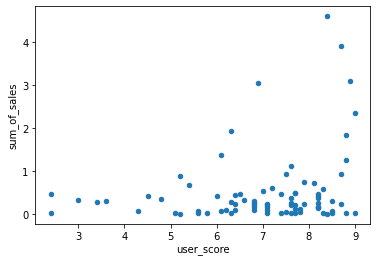

critic_score    0.331830
user_score      0.235238
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

ds


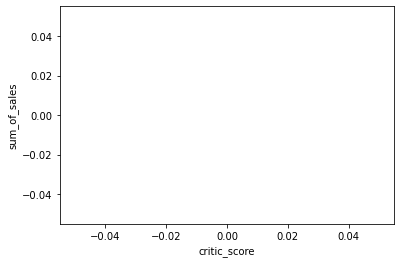

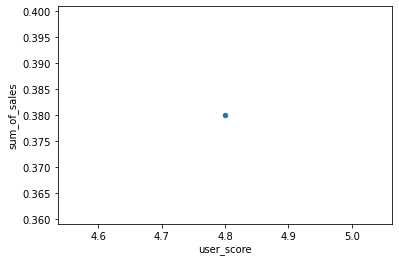

critic_score   NaN
user_score     NaN
sum_of_sales   NaN
Name: sum_of_sales, dtype: float64

pc


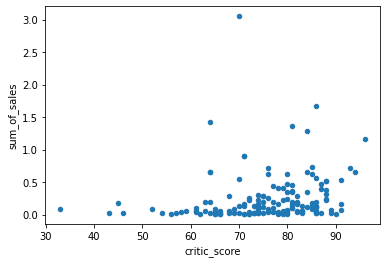

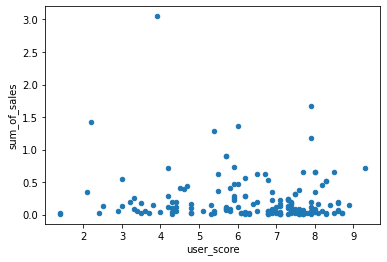

critic_score    0.181901
user_score     -0.082531
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

ps3


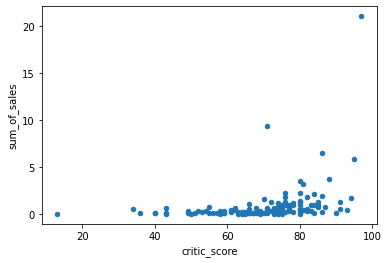

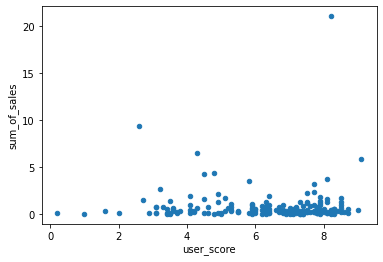

critic_score    0.335253
user_score      0.002449
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

ps4


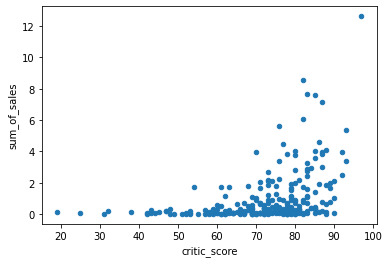

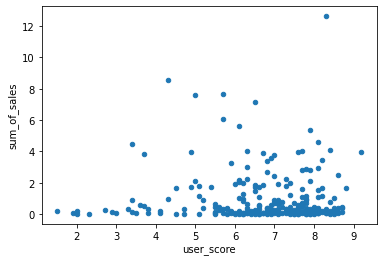

critic_score    0.405899
user_score     -0.033800
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

psp


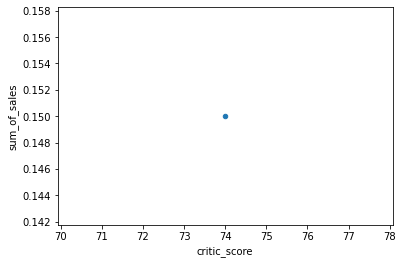

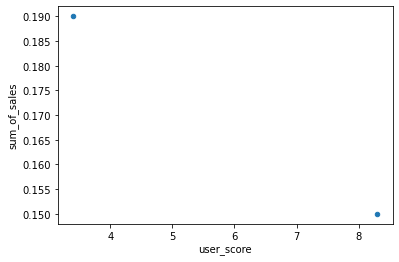

critic_score    NaN
user_score     -1.0
sum_of_sales    1.0
Name: sum_of_sales, dtype: float64

psv


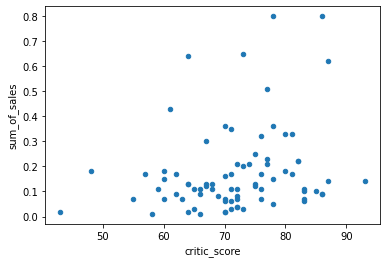

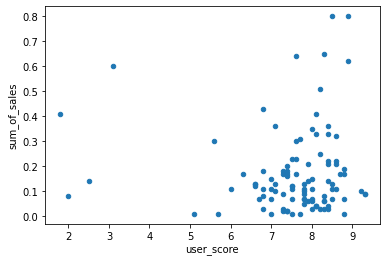

critic_score    0.240476
user_score     -0.006232
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

wii


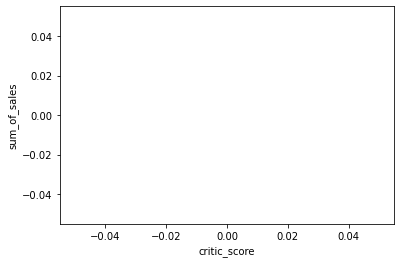

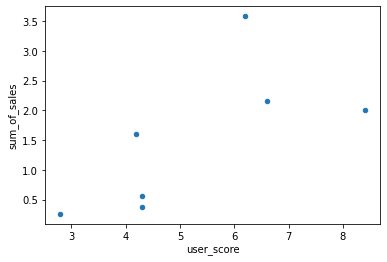

critic_score         NaN
user_score      0.682942
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

wiiu


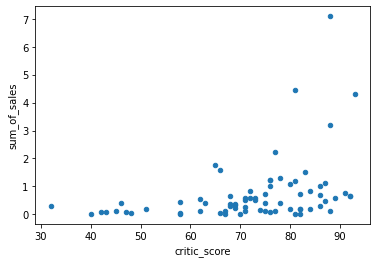

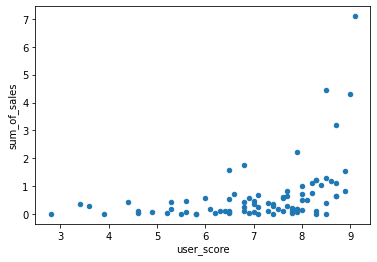

critic_score    0.366326
user_score      0.414170
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

x360


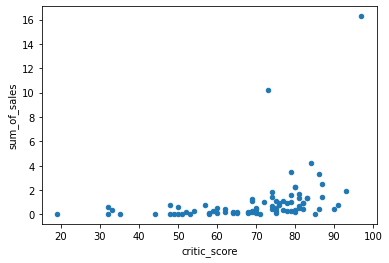

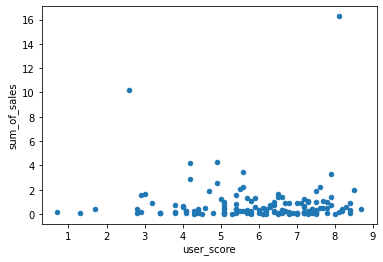

critic_score    0.350345
user_score     -0.007396
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

xone


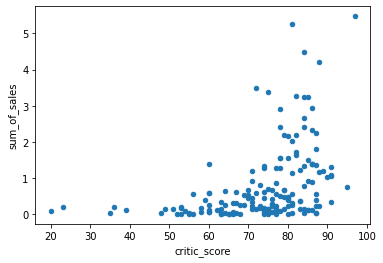

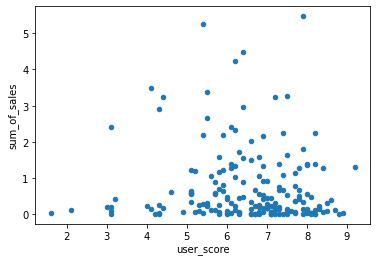

critic_score    0.407464
user_score     -0.069536
sum_of_sales    1.000000
Name: sum_of_sales, dtype: float64

In [102]:
# Комментарий ревьюера 3
df_sc, y = df[df.user_score != -1], 'sum_of_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print(platform)
    games_on_pl.plot(kind='scatter', x='critic_score', y=y)
    games_on_pl.plot(kind='scatter', x='user_score', y=y)
    plt.show()
    display(games_on_pl[['critic_score', 'user_score', y]].corr()[y])

### Рассмотрим общее распределение игр по жанрам

In [79]:
df.groupby('genre')['sum_of_sales'].median()

genre
action          0.110
adventure       0.030
fighting        0.130
misc            0.105
platform        0.240
puzzle          0.060
racing          0.120
role-playing    0.120
shooter         0.440
simulation      0.100
sports          0.230
strategy        0.080
Name: sum_of_sales, dtype: float64

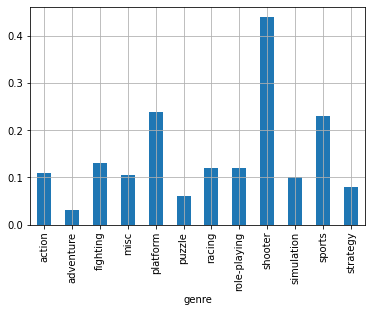

In [80]:
df.groupby('genre')['sum_of_sales'].median().plot(kind = 'bar', grid = True);

* Самый высокий показатель по сумме продаж у стрелялки. У этого жанра очень большой отрыв от остальных. Затем  идут: платформеры, спорт экшн и рейсинг. Самый низкий показатель у приключенческого жанра. Так же низкие показатели у жанров: пазлы и стратегии.

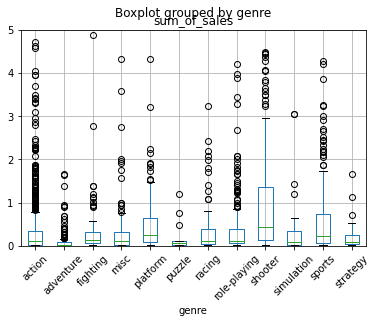

In [81]:
df.boxplot('sum_of_sales', 'genre')
plt.ylim(0,5)
plt.xticks(rotation=45);

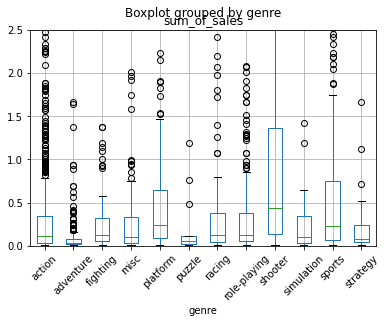

In [82]:
df.boxplot('sum_of_sales', 'genre')
plt.ylim(0, 2.5)
plt.xticks(rotation=45);

На диаграмме размаха мы видим насколько сильно отличаются стрелялки от других жанров.

In [83]:
df.groupby('genre')['sum_of_sales'].sum()

genre
action          326.19
adventure        24.06
fighting         35.50
misc             63.57
platform         43.29
puzzle            3.17
racing           39.89
role-playing    147.19
shooter         233.30
simulation       27.66
sports          151.64
strategy         10.60
Name: sum_of_sales, dtype: float64

In [84]:
df.groupby('genre')['platform'].count()

genre
action          785
adventure       250
fighting         81
misc            158
platform         75
puzzle           17
racing           85
role-playing    298
shooter         189
simulation       65
sports          219
strategy         57
Name: platform, dtype: int64

Даже не знаю, как такое интерпретировать. Т.к. я далека от игровой тематики, но учитывая показатели мы видим, что при высокой сумме продаж стрелялок, общий доход от суммы продаж экшна выше. Возможно потому, что их больше представлено по кол-ву. Ну и мы учитываем что стандартный медианный доход по стрелялкам выше чем стандартный медианный доход от экшена, причем прилично. Посмотрим дальше 

Практически все суммы с продаж в шутерах находяться в более высоких значениях, чем у экшн. 

### Определяем портрет пользователя для разных регионов Топ 5

In [85]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
2,Mario Kart Wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,Wii Sports Resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,Pokemon Red/Pokemon Blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,-1.0,no_rating,31.38
5,Tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,no_rating,30.26


In [86]:
df_na = df.query('na_sales > 0') # создаем отдельные таблицы для каждог региона
df_eu = df.query('eu_sales > 0')
df_jp = df.query('jp_sales > 0')
df_other = df.query('other_sales > 0')

In [87]:
df.groupby('genre')['sum_of_sales'].sum()

genre
action          326.19
adventure        24.06
fighting         35.50
misc             63.57
platform         43.29
puzzle            3.17
racing           39.89
role-playing    147.19
shooter         233.30
simulation       27.66
sports          151.64
strategy         10.60
Name: sum_of_sales, dtype: float64

In [88]:
df_region = df[['na_sales', 'jp_sales', 'eu_sales', 'other_sales']]

df_region  

,na_sales,jp_sales,eu_sales,other_sales
0,7.02,0.98,9.09,3.96
1,9.66,0.06,5.14,1.41
2,6.03,0.36,5.86,2.38
3,5.28,4.35,4.19,0.78
4,3.96,0.38,6.31,1.97
...,...,...,...,...
2274,0.00,0.01,0.00,0.00
2275,0.00,0.01,0.00,0.00
2276,0.00,0.01,0.00,0.00
2277,0.00,0.01,0.00,0.00


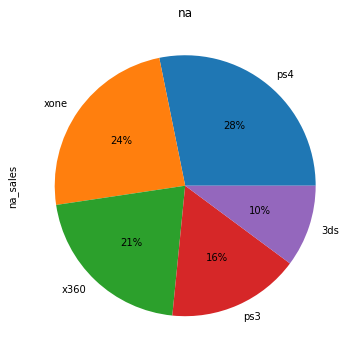

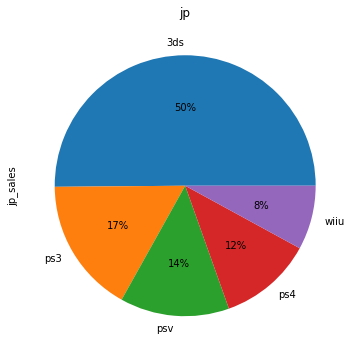

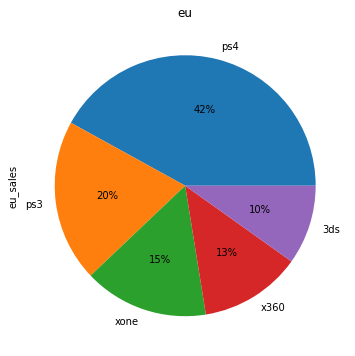

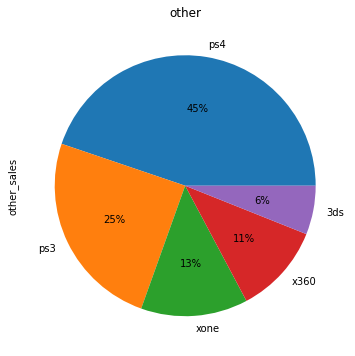

In [89]:
na_pie = df_na.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum')
na_pie.sort_values(by = 'na_sales', ascending=False).head(5)\
.plot(kind='pie', autopct='%1.0f%%', y = 'na_sales', figsize=(6, 6)\
      , legend=False, title = 'na')
plt.show();

jp_pie = df.pivot_table(index='platform' , values = 'jp_sales', aggfunc = 'sum')
jp_pie.sort_values(by = 'jp_sales', ascending=False).head(5)\
.plot(kind='pie', autopct='%1.0f%%', y = 'jp_sales', figsize=(6, 6)\
      , legend=False, title = 'jp')
plt.show();

eu_pie = df.pivot_table(index='platform' , values = 'eu_sales', aggfunc = 'sum')
eu_pie.sort_values(by = 'eu_sales', ascending=False).head(5)\
.plot(kind='pie', autopct='%1.0f%%', y = 'eu_sales', figsize=(6, 6)\
      , legend=False, title = 'eu')
plt.show();

other_pie = df.pivot_table(index='platform' , values = 'other_sales', aggfunc = 'sum')
other_pie.sort_values(by = 'other_sales', ascending=False).head(5)\
.plot(kind='pie', autopct='%1.0f%%', y = 'other_sales', figsize=(6, 6)\
      , legend=False, title = 'other')
plt.show();

Лидером по продажам в США является x360, на втором месте ps3. В Японии львиную долю рынка держит 3ds. В Европе и Других страна ps3.

In [90]:
na_pie.sort_values(by = 'na_sales',ascending = False)

,na_sales
platform,
ps4,109.40
xone,93.81
x360,81.79
ps3,63.71
3ds,39.42
wiiu,30.18
pc,11.76
wii,6.56
psv,5.05


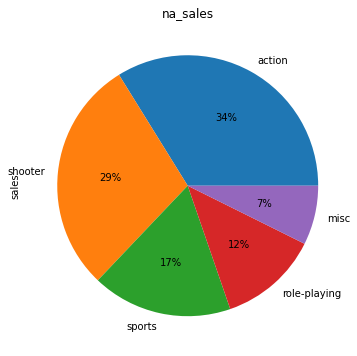

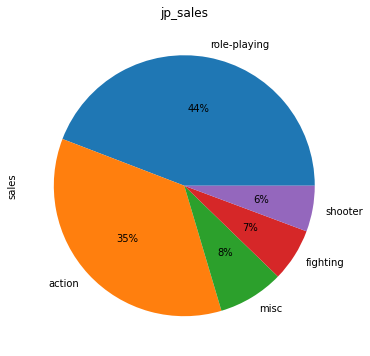

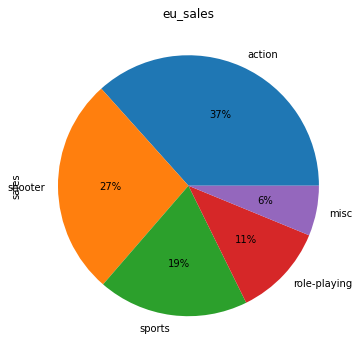

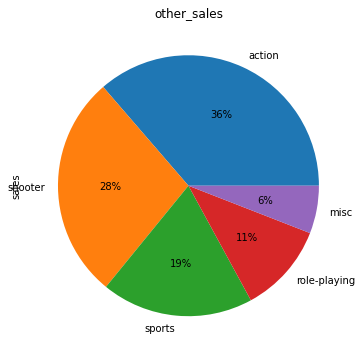

In [91]:
for region in df_region:
    (df.pivot_table(index='genre', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='sales')
    )
    plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

В США, Европе и Других странах лидером по продажам является экшн, на втором месте стрелялки. В Японии на первом месте ролевые игры, на втором экшн.

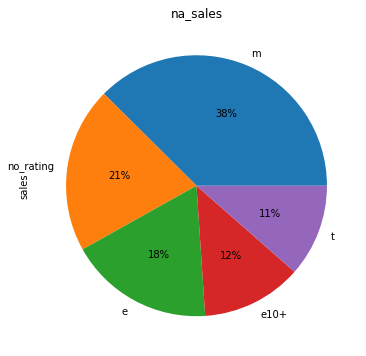

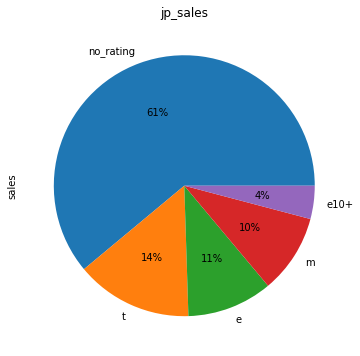

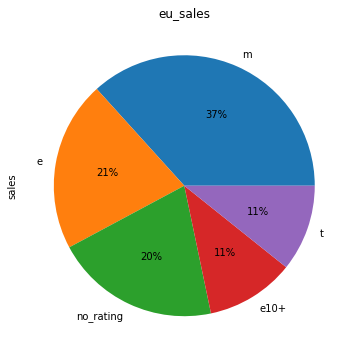

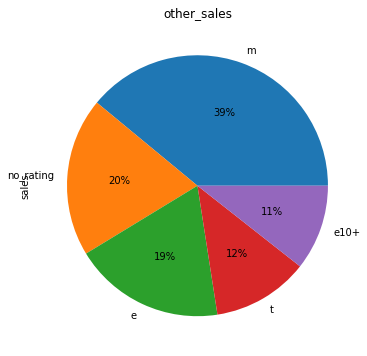

In [92]:
for region in df_region:
    (df.pivot_table(index='rating', values=region, aggfunc='sum')
                .sort_values(region, ascending=False).head(5)
                .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = region)
                .set(ylabel='sales')
    )
    plt.show()

В США, Европе и Других странах популярны игры для взрослых(m), причем в Европе и Других странах присутствуют игры без рейтинга ESRB. В Японии 57% игр без рейтинга ESRB приносят доход.

In [93]:
# Комментарий ревьюера
temp = df.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


no_rating    1000
m             374
t             340
e             307
e10+          258
Name: rating, dtype: int64

###  Проверка гипотез

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

In [94]:
from scipy import stats as st

##### Проверяем гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: рейтинги платформ Xbox one  =  рейтинги платформ PC 
H_a: рейтинги платформ Xbox One  ≠ рейтинги платформ PC 
уровень значимости берем .05 
alpha = 0.05
```

In [95]:
#xone = data[(data['platform'] == 'xone') & (data['user_score']!=0)]
#ps3 = data[(data['platform'] == 'ps3') & (data['user_score']!=0)]

#results = st.ttest_ind(xone['user_score'], ps3['user_score']\
     #                  , equal_var = False )
#alpha = .05

#print(results.pvalue)

#if results.pvalue < alpha:
 #   print('Отвергаем нулевую гипотезу')
#else:
#    print('Не получилось отвергнуть нулевую гипотезу')

In [96]:
xone = df[(df['platform'] == 'xone') & (df['user_score']>0)]
pc = df[(df['platform'] == 'pc') & (df['user_score']>0)]

results = st.ttest_ind(xone['user_score'], pc['user_score']\
                       , equal_var = False )
alpha = .05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.17823761635465715
Не получилось отвергнуть нулевую гипотезу


In [97]:
display(xone['user_score'].mean())
pc['user_score'].mean()

6.5201086956521745

6.289308176100628

In [98]:
# Комментарий ревьюера
xone.user_score.min()

1.6

* Делаем вывод, что рейтинги этих платформ одинаковы. 

#### Проверяем гипотезу, что cредние пользовательские рейтинги жанров Action  и Sports разные.

```
H_0: рейтинги Action  =  рейтинг Sports 
H_a: рейтинги Action  ≠  рейтинг Sports 
alpha = 0.05
```

In [99]:
action = df[(df['genre'] == 'action') & (df['user_score'] > 0)]
sports = df[(df['genre'] == 'sports') & (df['user_score']> 0)]

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(action['user_score'], sports['user_score']\
                       , equal_var = False )
alpha = .05
 
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.233988100374228e-21
Отвергаем нулевую гипотезу


In [100]:
display(action['user_score'].mean())
sports['user_score'].mean()

6.848354430379747

5.225925925925925

* Средние пользовательские рейтинги жанров Action  и Sports разные

Хорошо, спасибо

### Общий вывод

#### В ходе проделанной работы мы выяснили, что:
```
* Сумма с продаж игр стремительно росла до 2011 года. 
С этого периода наблюдается падение.

* Кол-во выпускаемых игр при этом также самое высокое именно в этот период.
Хотя с 2011 года и эта цифра падает. Возможно наступило перенасыщение рынка.

* Можно предположить, что данный сегмент постепенно затухает на основании 
 исследования по годам.

* Наиболее высокие показатели по выручке между регионами, в Америке, затем 
идет Европа и только за ней Япония.

* Наиболее популярные платформы в Америке: x360 и ps3, 
в Европе и Других странах : ps3 и ps4.
В Японии: 3ds и ps3.

* Жанр игр по регионам так же различается. В Америке,Европе и Других странах 
основной интерес к жанрам: экшн и стрелялки. 
в Японии предпочитают ролевые игры и экшн.

* Интервал работы платформы в среднем 10 лет

* В США, Европе и Других странах, наиболее интересен рейтинг для взрослых. В Японии данный рейтинг не ставится, высокие показатели у  no_rating

* В рекламной компании лучше опираться на мнение критиков,
а не рейтинг пользователей.

* Выбор платформы и жанра игры должен делаться в зависимости от региона. 
Т.к. Япония достаточно сильно отличается от остальных по предпочтениям.

```